# This notebook is for data cleaning and Exploratory Data Analysis, which will be used for user persona analysis

* Starbucks dataset: https://www.kaggle.com/datasets/ihormuliar/starbucks-customer-data
* `profile.csv` - dimensional data about each person, including their age, salary, and gender. There is one unique customer for each record
* `portfolio.csv` - information about the promotional offers that are possible to receive, and basic information about each one including the promotional type, duration of the promotion, reward, and how the promotion was distributed to customers
* `transcript.csv` - records show the different steps of promotional offers that a customer received. The different values of receiving a promotion are receiving, viewing, and completing. You also see the different transactions that a person made in the time since he became a customer. With all records, you see the day that they interacted with Starbucks and the amount that it is worth

## Settings

In [1]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import altair as alt

/Users/aigerimshopenova/opt/anaconda3/envs/dev_fest/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Reading and exploring available data

### Profile data

In [3]:
df_p = pd.read_csv("./data/starbucks/profile.csv")

In [4]:
df_p.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,"112,000.00"
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,"100,000.00"
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [5]:
df_p.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [7]:
df_p.duplicated().sum()

0

In [8]:
df_p.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [9]:
df_p['id'].nunique()

17000

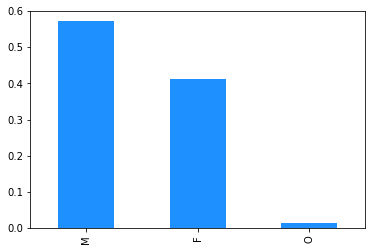

In [10]:
df_p['gender'].value_counts(normalize=True).plot.bar(color='dodgerblue');

In [11]:
df_p['gender'].value_counts(normalize=True)

M   0.57
F   0.41
O   0.01
Name: gender, dtype: float64

The majority of records belongs to Male users (57%)

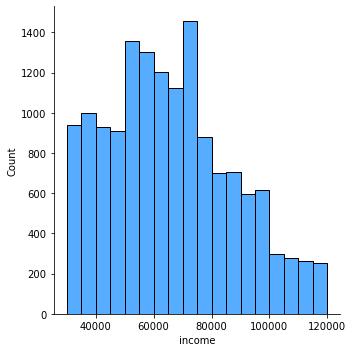

In [12]:
sns.displot(df_p, x="income", color='dodgerblue', binwidth=5000);

In [13]:
df_p['income'].describe()

count    14,825.00
mean     65,404.99
std      21,598.30
min      30,000.00
25%      49,000.00
50%      64,000.00
75%      80,000.00
max     120,000.00
Name: income, dtype: float64

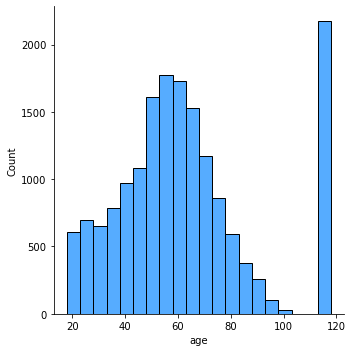

In [14]:
sns.displot(df_p, x="age", color='dodgerblue', binwidth=5);

In [15]:
df_p['age'].describe(percentiles=[0.8, 0.9, 0.95, 0.98, 0.99])

count   17,000.00
mean        62.53
std         26.74
min         18.00
50%         58.00
80%         78.00
90%        118.00
95%        118.00
98%        118.00
99%        118.00
max        118.00
Name: age, dtype: float64

In [16]:
df_p[(df_p['age'] > 80) & (df_p['age'] <= 100)]

,gender,age,id,became_member_on,income
33,F,96,868317b9be554cb18e50bc68484749a2,20171117,"89,000.00"
94,F,89,4264b1d027cc493281bba4f44bfedaca,20171114,"87,000.00"
98,F,90,1c587de019994f93a242c6864fd7bc55,20151210,"98,000.00"
126,M,83,4c29d22467af4d7faa137c4eedd65340,20180127,"46,000.00"
131,F,89,3dae0eadb47149b0b9b548d14548524b,20180114,"65,000.00"
...,...,...,...,...,...
16914,M,87,d1c4500ace2e45e9a45d3cd2fccac8d8,20140920,"59,000.00"
16933,M,85,a65353ea28ff442aabfb39eb974326e3,20161001,"96,000.00"
16938,F,89,da7bf9d84fd74a72bdee595007bcca7a,20170413,"68,000.00"
16981,M,84,1966fa40d2f84620b2b1b9b64f8e0209,20160629,"93,000.00"


In [17]:
df_p[df_p['age'] > 100]

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [18]:
df_p[df_p['age'] > 100]['income'].isnull().sum()

2175

In [19]:
df_p[df_p['age'] > 100]['gender'].isnull().sum()

2175

It seems that there are 2,175 users who didn't provide gender and income information. Also, these users identified themselves as over 100 y.o., which looks suspicious.

In [20]:
df_p['became_member_on'] = pd.to_datetime(df_p['became_member_on'], format='%Y%m%d')

In [21]:
print (df_p.dtypes)

gender                      object
age                          int64
id                          object
became_member_on    datetime64[ns]
income                     float64
dtype: object


In [22]:
df_p.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,"112,000.00"
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,"100,000.00"
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [23]:
df_p['became_member_on'].max()

Timestamp('2018-07-26 00:00:00')

In [24]:
df_p['became_member_on'].min()

Timestamp('2013-07-29 00:00:00')

In [25]:
df_p['days_being_member'] = (df_p['became_member_on'].max() - df_p['became_member_on']).dt.days

In [26]:
df_p.head()

,gender,age,id,became_member_on,income,days_being_member
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,529
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,"112,000.00",376
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,14
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,"100,000.00",443
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,356


In [27]:
df_p['days_being_member'].describe(percentiles=[0.8])

count   17,000.00
mean       517.45
std        411.22
min          0.00
50%        358.00
80%        876.00
max      1,823.00
Name: days_being_member, dtype: float64

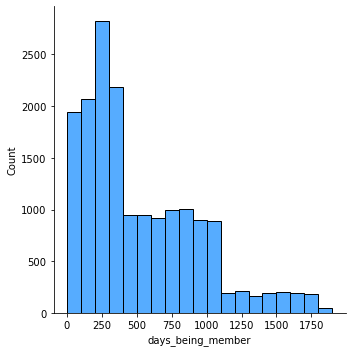

In [28]:
sns.displot(df_p, x="days_being_member", color='dodgerblue', binwidth=100);

***Write down thoughts for data cleaning***

### Portfolio

In [29]:
df_port = pd.read_csv("./data/starbucks/portfolio.csv")

In [150]:
df_port

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [140]:
df_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [31]:
df_port.shape

(10, 7)

In [32]:
df_port.drop(columns=['Unnamed: 0'], inplace=True)

In [33]:
df_port['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

In [149]:
df_port.columns = ['reward', 'channels', 'difficulty', 'duration', 'offer_type', 'offer_id']

### Transcript

In [34]:
df_t = pd.read_csv("./data/starbucks/transcript.csv")

In [35]:
df_t.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [36]:
df_t.shape

(306534, 5)

In [37]:
df_t.drop(columns=['Unnamed: 0'], inplace=True)

In [39]:
df_t['person'].nunique()

17000

In [40]:
df_t['event'].value_counts(normalize=True)

transaction       0.45
offer received    0.25
offer viewed      0.19
offer completed   0.11
Name: event, dtype: float64

Let's check transactions only

In [47]:
df_t[df_t['event'] == 'transaction']['value'].unique().tolist()

["{'amount': 0.8300000000000001}",
 "{'amount': 34.56}",
 "{'amount': 13.23}",
 "{'amount': 19.51}",
 "{'amount': 18.97}",
 "{'amount': 33.9}",
 "{'amount': 0.22}",
 "{'amount': 18.59}",
 "{'amount': 18.01}",
 "{'amount': 19.11}",
 "{'amount': 36.19}",
 "{'amount': 6.46}",
 "{'amount': 5.02}",
 "{'amount': 28.39}",
 "{'amount': 28.08}",
 "{'amount': 0.75}",
 "{'amount': 1.02}",
 "{'amount': 13.57}",
 "{'amount': 10.22}",
 "{'amount': 31.42}",
 "{'amount': 27.89}",
 "{'amount': 4.2}",
 "{'amount': 13.05}",
 "{'amount': 1.16}",
 "{'amount': 38.38}",
 "{'amount': 4.08}",
 "{'amount': 5.78}",
 "{'amount': 14.27}",
 "{'amount': 11.52}",
 "{'amount': 13.93}",
 "{'amount': 4.05}",
 "{'amount': 30.03}",
 "{'amount': 21.84}",
 "{'amount': 10.37}",
 "{'amount': 1.21}",
 "{'amount': 5.46}",
 "{'amount': 7.4}",
 "{'amount': 2.95}",
 "{'amount': 19.82}",
 "{'amount': 11.83}",
 "{'amount': 5.31}",
 "{'amount': 2.44}",
 "{'amount': 3.26}",
 "{'amount': 24.8}",
 "{'amount': 1.23}",
 "{'amount': 17.0}"

Let's check offers only

In [48]:
df_t[df_t['event'] != 'transaction']['value'].unique().tolist()

["{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}",
 "{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}",
 "{'offer id': '2906b810c7d4411798c6938adc9daaa5'}",
 "{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}",
 "{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}",
 "{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}",
 "{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}",
 "{'offer id': '3f207df678b143eea3cee63160fa8bed'}",
 "{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}",
 "{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}",
 "{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",
 "{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}",
 "{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}",
 "{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd', 'reward': 10}",
 "{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0', 'reward': 10}",
 "{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}",
 "{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",
 "{'of

In [49]:
df_tr = df_t[df_t['event'] == 'transaction']

In [108]:
df_off = df_t[df_t['event'] != 'transaction']

In [56]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  138953 non-null  object
 1   event   138953 non-null  object
 2   value   138953 non-null  object
 3   time    138953 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.3+ MB


In [59]:
df_tr

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [62]:
df_tr['person'].nunique()

16578

In [76]:
df_tr['value'][12654][11:16]

'0.830'

In [93]:
df_tr['transaction_amount'] = df_tr['value'].str[11:16]
df_tr['transaction_amount'] = df_tr['transaction_amount'].str.replace('}', '')

/var/folders/fp/tzbl0_317czbpmy_pcmtyc5m0000gn/T/ipykernel_15182/1790544983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['transaction_amount'] = df_tr['value'].str[11:16]
/var/folders/fp/tzbl0_317czbpmy_pcmtyc5m0000gn/T/ipykernel_15182/1790544983.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tr['transaction_amount'] = df_tr['transaction_amount'].str.replace('}', '')
/var/folders/fp/tzbl0_317czbpmy_pcmtyc5m0000gn/T/ipykernel_15182/1790544983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [94]:
df_tr

,person,event,value,time,transaction_amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0,0.830
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0,18.97
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,1.589
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,3.530


In [99]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person              138953 non-null  object 
 1   event               138953 non-null  object 
 2   value               138953 non-null  object 
 3   time                138953 non-null  int64  
 4   transaction_amount  138953 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [98]:
df_tr['transaction_amount'] = df_tr['transaction_amount'].astype(float)

/var/folders/fp/tzbl0_317czbpmy_pcmtyc5m0000gn/T/ipykernel_15182/249770263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['transaction_amount'] = df_tr['transaction_amount'].astype(float)


In [100]:
df_tr['transaction_amount'].describe()

count   138,953.00
mean         12.78
std          30.25
min           0.05
25%           2.78
50%           8.89
75%          18.07
max       1,062.00
Name: transaction_amount, dtype: float64

In [101]:
df_tr['transaction'] = 1

/var/folders/fp/tzbl0_317czbpmy_pcmtyc5m0000gn/T/ipykernel_15182/3195131981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['transaction'] = 1


In [102]:
df_tr.head()

,person,event,value,time,transaction_amount,transaction
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0,0.83,1
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0,34.56,1
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0,13.23,1
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0,19.51,1
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0,18.97,1


In [103]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person              138953 non-null  object 
 1   event               138953 non-null  object 
 2   value               138953 non-null  object 
 3   time                138953 non-null  int64  
 4   transaction_amount  138953 non-null  float64
 5   transaction         138953 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.5+ MB


In [104]:
df_tr.describe()

,time,transaction_amount,transaction
count,"138,953.00","138,953.00","138,953.00"
mean,381.58,12.78,1.00
std,201.70,30.25,0.00
min,0.00,0.05,1.00
25%,210.00,2.78,1.00
50%,402.00,8.89,1.00
75%,552.00,18.07,1.00
max,714.00,"1,062.00",1.00


In [107]:
df_tr.duplicated().sum()

0

In [110]:
df_off['value'].value_counts()

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}                  14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}                  14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}                  14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}                  14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}                  14374
{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}                  14305
{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}                  11848
{'offer id': '3f207df678b143eea3cee63160fa8bed'}                  11761
{'offer id': '2906b810c7d4411798c6938adc9daaa5'}                  11750
{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}                  10331
{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}      5317
{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}      5156
{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}      4354
{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}   

In [138]:
df_off['offer_id'] = df_off['value'].str[14:46]

/var/folders/fp/tzbl0_317czbpmy_pcmtyc5m0000gn/T/ipykernel_15182/2076417069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_off['offer_id'] = df_off['value'].str[14:46]


In [139]:
df_off

,person,event,value,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714,2298d6c36e964ae4a3e7e9706d1fb8c2
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,fafdcd668e3743c1bb461111dcafc2a4
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},714,0b1e1539f2cc45b7b9fa7c272da2e1d7
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,fafdcd668e3743c1bb461111dcafc2a4


In [141]:
df_off_one_hot_enc = pd.get_dummies(df_off, columns = ['event'])

In [142]:
df_off_one_hot_enc

,person,value,time,offer_id,event_offer completed,event_offer received,event_offer viewed
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0
...,...,...,...,...,...,...,...
306497,a6f84f4e976f44508c358cc9aba6d2b3,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714,2298d6c36e964ae4a3e7e9706d1fb8c2,1,0,0
306506,b895c57e8cd047a8872ce02aa54759d6,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,fafdcd668e3743c1bb461111dcafc2a4,1,0,0
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},714,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1
306509,8431c16f8e1d440880db371a68f82dd0,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,fafdcd668e3743c1bb461111dcafc2a4,1,0,0


In [144]:
df_off_one_hot_enc.columns = ['person', 'value', 'time', 'offer_id', 'offer_completed',
                              'offer_received', 'offer_viewed']

In [145]:
df_off_one_hot_enc

,person,value,time,offer_id,offer_completed,offer_received,offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0
...,...,...,...,...,...,...,...
306497,a6f84f4e976f44508c358cc9aba6d2b3,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714,2298d6c36e964ae4a3e7e9706d1fb8c2,1,0,0
306506,b895c57e8cd047a8872ce02aa54759d6,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,fafdcd668e3743c1bb461111dcafc2a4,1,0,0
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},714,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1
306509,8431c16f8e1d440880db371a68f82dd0,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,fafdcd668e3743c1bb461111dcafc2a4,1,0,0


In [152]:
df_off = pd.merge(df_off_one_hot_enc, df_port[['offer_type', 'offer_id']],
                  left_on=['offer_id'],
                  right_on=['offer_id'],
                  how='left')

In [153]:
df_off

,person,value,time,offer_id,offer_completed,offer_received,offer_viewed,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,bogo
1,a03223e636434f42ac4c3df47e8bac43,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,discount
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,0,1,0,discount
3,8ec6ce2a7e7949b1bf142def7d0e0586,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,discount
4,68617ca6246f4fbc85e91a2a49552598,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,bogo
...,...,...,...,...,...,...,...,...
167576,a6f84f4e976f44508c358cc9aba6d2b3,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714,2298d6c36e964ae4a3e7e9706d1fb8c2,1,0,0,discount
167577,b895c57e8cd047a8872ce02aa54759d6,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,fafdcd668e3743c1bb461111dcafc2a4,1,0,0,discount
167578,8dda575c2a1d44b9ac8e8b07b93d1f8e,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},714,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1,discount
167579,8431c16f8e1d440880db371a68f82dd0,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,fafdcd668e3743c1bb461111dcafc2a4,1,0,0,discount


In [154]:
df_off_one_hot_enc = pd.get_dummies(df_off, columns = ['offer_type'])

In [155]:
df_off_one_hot_enc

,person,value,time,offer_id,offer_completed,offer_received,offer_viewed,offer_type_bogo,offer_type_discount,offer_type_informational
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0,1,0
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,0,1,0,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
167576,a6f84f4e976f44508c358cc9aba6d2b3,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714,2298d6c36e964ae4a3e7e9706d1fb8c2,1,0,0,0,1,0
167577,b895c57e8cd047a8872ce02aa54759d6,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,fafdcd668e3743c1bb461111dcafc2a4,1,0,0,0,1,0
167578,8dda575c2a1d44b9ac8e8b07b93d1f8e,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},714,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1,0,1,0
167579,8431c16f8e1d440880db371a68f82dd0,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,fafdcd668e3743c1bb461111dcafc2a4,1,0,0,0,1,0


In [157]:
df_off_tr = pd.merge(df_off_one_hot_enc, df_tr[['person',
                                                'transaction',
                                                'transaction_amount']],
                     left_on='person',
                     right_on='person',
                     how='left')

In [159]:
df_off_tr.columns

Index(['person', 'value', 'time', 'offer_id', 'offer_completed',
       'offer_received', 'offer_viewed', 'offer_type_bogo',
       'offer_type_discount', 'offer_type_informational', 'transaction',
       'transaction_amount'],
      dtype='object')

In [161]:
df_off_tr = df_off_tr[['person', 'offer_completed', 'offer_received', 'offer_viewed',
                       'offer_type_bogo', 'offer_type_discount', 'offer_type_informational',
                       'transaction', 'transaction_amount']]

In [162]:
df_off_tr

,person,offer_completed,offer_received,offer_viewed,offer_type_bogo,offer_type_discount,offer_type_informational,transaction,transaction_amount
0,78afa995795e4d85b5d9ceeca43f5fef,0,1,0,1,0,0,1.00,19.89
1,78afa995795e4d85b5d9ceeca43f5fef,0,1,0,1,0,0,1.00,17.78
2,78afa995795e4d85b5d9ceeca43f5fef,0,1,0,1,0,0,1.00,19.67
3,78afa995795e4d85b5d9ceeca43f5fef,0,1,0,1,0,0,1.00,29.72
4,78afa995795e4d85b5d9ceeca43f5fef,0,1,0,1,0,0,1.00,23.93
...,...,...,...,...,...,...,...,...,...
1469195,8431c16f8e1d440880db371a68f82dd0,1,0,0,0,1,0,1.00,1.19
1469196,24f56b5e1849462093931b164eb803b5,1,0,0,0,1,0,1.00,21.39
1469197,24f56b5e1849462093931b164eb803b5,1,0,0,0,1,0,1.00,14.12
1469198,24f56b5e1849462093931b164eb803b5,1,0,0,0,1,0,1.00,16.92


In [163]:
df_off_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469200 entries, 0 to 1469199
Data columns (total 9 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   person                    1469200 non-null  object 
 1   offer_completed           1469200 non-null  uint8  
 2   offer_received            1469200 non-null  uint8  
 3   offer_viewed              1469200 non-null  uint8  
 4   offer_type_bogo           1469200 non-null  uint8  
 5   offer_type_discount       1469200 non-null  uint8  
 6   offer_type_informational  1469200 non-null  uint8  
 7   transaction               1465827 non-null  float64
 8   transaction_amount        1465827 non-null  float64
dtypes: float64(2), object(1), uint8(6)
memory usage: 53.2+ MB


In [164]:
df_off_tr.fillna(0, inplace=True)

In [165]:
df_t_p = df_off_tr.groupby('person').agg({'offer_completed':'sum',
                                 'offer_received':'sum',
                                 'offer_viewed':'sum',
                                 'offer_type_bogo':'sum',
                                 'offer_type_discount':'sum',
                                 'offer_type_informational':'sum',
                                 'transaction':'sum',
                                 'transaction_amount':'sum'}).reset_index()

In [166]:
df_t_p

,person,offer_completed,offer_received,offer_viewed,offer_type_bogo,offer_type_discount,offer_type_informational,transaction,transaction_amount
0,0009655768c64bdeb2e877511632db8f,24,40,32,24.00,40.00,32,96.00,"1,531.20"
1,00116118485d4dfda04fdbaba9a87b5c,0,6,6,12.00,0.00,0,12.00,16.36
2,0011e0d4e6b944f998e987f904e8c1e5,15,25,25,15.00,30.00,20,65.00,"1,032.98"
3,0020c2b971eb4e9188eac86d93036a77,24,40,24,32.00,40.00,16,88.00,"2,165.46"
4,0020ccbbb6d84e358d3414a3ff76cffd,36,48,48,72.00,36.00,24,132.00,"1,694.55"
...,...,...,...,...,...,...,...,...,...
16989,fff3ba4757bd42088c044ca26d73817a,33,66,33,33.00,66.00,33,132.00,"6,971.52"
16990,fff7576017104bcc8677a8d63322b5e1,18,30,24,36.00,36.00,0,72.00,359.28
16991,fff8957ea8b240a6b5e634b6ee8eafcf,0,15,10,10.00,10.00,5,25.00,60.75
16992,fffad4f4828548d1b5583907f2e9906b,36,48,48,108.00,0.00,24,132.00,977.13


In [175]:
df_t_p.shape

(16994, 9)

In [176]:
df_p.shape

(14820, 6)

In [177]:
df_p.head()

,gender,age,id,became_member_on,income,days_being_member
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,"112,000.00",376
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,"100,000.00",443
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,"70,000.00",91
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,"53,000.00",167
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,"51,000.00",257


In [179]:
df_p.columns = ['gender', 'age', 'person', 'became_member_on', 'income','days_being_member']

In [ ]:
df['col'] = df['col'].str[:9]

In [64]:
df_tr[['split']] = df_tr['value'].str.split(':', 1, expand=True)

ValueError: Columns must be same length as key

In [ ]:
df[['A', 'B']] = df['AB'].str.split(',', 1, expand=True)

In [ ]:
df_t.groupby('person').agg({'event':'nunique'}).reset_index().sort_values(by='event', ascending=False)

## Data cleaning

### Profile data

In [167]:
df_p = df_p[df_p['age'] <= 100]

In [168]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14820 entries, 1 to 16999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gender             14820 non-null  object        
 1   age                14820 non-null  int64         
 2   id                 14820 non-null  object        
 3   became_member_on   14820 non-null  datetime64[ns]
 4   income             14820 non-null  float64       
 5   days_being_member  14820 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 810.5+ KB


In [169]:
df_p.isnull().sum()

gender               0
age                  0
id                   0
became_member_on     0
income               0
days_being_member    0
dtype: int64

In [170]:
df_p.describe()

,age,income,days_being_member
count,"14,820.00","14,820.00","14,820.00"
mean,54.38,"65,404.18",522.49
std,17.37,"21,598.76",419.23
min,18.00,"30,000.00",0.00
25%,42.00,"49,000.00",208.00
50%,55.00,"64,000.00",358.00
75%,66.00,"80,000.00",797.00
max,100.00,"120,000.00","1,823.00"


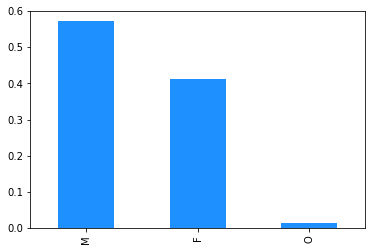

In [171]:
df_p['gender'].value_counts(normalize=True).plot.bar(color='dodgerblue');

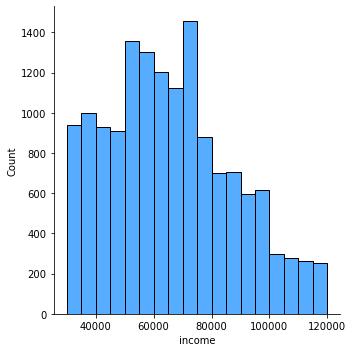

In [172]:
sns.displot(df_p, x="income", color='dodgerblue', binwidth=5000);

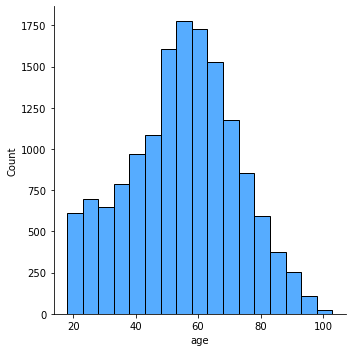

In [173]:
sns.displot(df_p, x="age", color='dodgerblue', binwidth=5);

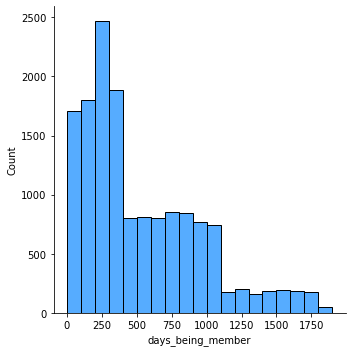

In [174]:
sns.displot(df_p, x="days_being_member", color='dodgerblue', binwidth=100);

In [ ]:
df_t.info()

In [ ]:
df_t['person'].nunique()

In [ ]:
df_t['event'].value_counts(normalize=True)

In [ ]:
df_t['value'].value_counts(normalize=True)

In [ ]:
df_t['value'].nunique()

In [ ]:
df_c = pd.read_csv("./data/starbucks/portfolio.csv")

In [ ]:
df_c.head()

In [ ]:
df_c.info()